<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера:</b> 
    
~~Антон, привет! Меня зовут Влада. Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='blue'>синий — «хорошо, но можно лучше (исправлять необязательно)»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###». Пожалуйста, не удаляй мои комментарии, они мне нужны при повторной проверке.~~
    
~~Антон,спасибо! Осталось только несколько мелких замечаний, все остальное в полном порядке :)~~
    
~~Антон, по твоей просьбе высылаю проект на доработку без проверки.~~
    
~~Антон, осталось еще несколько неточностей. Жду финальную версию :)~~
    
~~Антон, есть 2 замечания: после 35 ячейки с кодом и после 45 ячейки. Еще один рывок, и проект будет принят :)~~
    
Отлично, молодец, проект принимаю!

</div>

Влада, привет! :)
Доработал, надеюсь, что все учла) 

Хорошего вечера или уже дня) 

~~Влада, спасибо, что вернула проект без проверки. 
Все замечания доработал, надеюсь, что теперь все ок :) ~~

~~Хорошего дня! ~~

~~Влада, привет! Приятно заочно познакомиться. ~~

~~Я постарался учесть все пожелания, однако я переработал немного свою работу (первый вариант третьего пункта я оставил, перевел из code в markdown он внизу работы, твои комментарии, конечно, я не трогал :), так как столкнулся с тем, что, когда начал вносить твои пожелания, вообще результаты все поехали. Поэтому, учтя твои рекомендации переработал третий пункт. Мне кажется, он получился куда более наглядным. Надеюсь, что я недоставил тебе неудобства.~~

~~Хорошего дня!)~~

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

### Инструкция по выполнению проекта
#### 1. Подготовьте данные

1.1. Откройте файлы и изучите их

Путь к файлам:
- /datasets/gold_recovery_train.csv
- /datasets/gold_recovery_test.csv
- /datasets/gold_recovery_full.csv

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы

1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

1.4. Проведите предобработку данных

#### 2. Проанализируйте данные

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы

2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

#### 3. Постройте модель

3.1. Напишите функцию для вычисления итоговой sMAPE

3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы

# 1. Подготовка данных

#### 1.1. Открываем файлы и изучаем их. 

Для начала импортируем библиотеки, получим все данные и рассмотрим общую информацию об импортированных данных.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import defaultdict
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
data_train.shape

(16860, 87)

In [6]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [8]:
data_test.shape

(5856, 53)

In [9]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [11]:
data_full.shape

(22716, 87)

Зафиксируем псевдослучайность для всех используемых в проекте алгоритмов:

In [12]:
rnd_state = 12345

<div class="alert alert-block alert-success">
Хорошо, на данные посмотрели.
</div>

#### 1.2. Проверяем, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Вычисляем MAE между расчётами и значением признака.

In [13]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [14]:
data_train['rougher.output.recovery_calc'] = C * (F - T) * 100 / (F * (C - T))

In [15]:
def mae(target_recovery, calculated_recovery):
    return abs(target_recovery - calculated_recovery).sum() / len(target_recovery)

target_recovery = data_train['rougher.output.recovery']
calculated_recovery = data_train['rougher.output.recovery_calc']

mae(target_recovery, calculated_recovery)

9.235396156801791e-15

<div class="alert alert-block alert-info">

~~Зачем заполнять пропуски при расчете MAE (interpolate)? Пропуски лучше не учитывать.~~
</div> 

-переделала

<div class="alert alert-block alert-success">
MAE найдено верно. Значит, формула для расчета эффективности корректная, и доступные данные ее подтверждают.
</div>

Как мы видим средняя абсолютная ошибка достаточно мала, считаем считаем что recovery посчитан верно

In [16]:
data_train.drop('rougher.output.recovery_calc', axis=1, inplace=True)

#### 1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [17]:
data_test_cols = list(data_train.columns.difference(data_test.columns))
data_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [18]:
#Зафиксируем datetime
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
data_test = data_full[data_full['date'].isin(data_test['date'])]

#создадим список столбцов, в которые есть в тестовом выборке 
list_of_columns = data_test.columns.to_list()

#список столбцов, которые необходимо добавить в тестовую выборку
target_columns = ['rougher.output.recovery','final.output.recovery']

#список стобцов, по которым обрезаем общую выборку
full_list = data_test.columns.to_list()
full_list.extend(target_columns)

#обрезаем общую выборку
temp = data_full[full_list].copy()

print(temp.shape)

temp['date'] = pd.to_datetime(temp['date'], format='%Y-%m-%dT%H:%M:%S')
results = data_test.merge(temp, on=list_of_columns, how='left')

В тесте нет признаков output, это целевые признаки, calculation для этапа rougher - возможно, данные этих признаков рассчитываются позднее и недоступны во время процесса. 

<div class="alert alert-block alert-success">
Список признаков, недоступных в тестовой выборке, найден правильно. Эти признаки недоступны, так как их невозможно получить/измерить во время выполнения технологического процесса.
</div>

<div class="alert alert-block alert-danger">

~~Что это за признаки? К какому типу по отношению к технологическому процессу они относятся?~~
</div>

</font> <font color='black'> - выше добавил вывод

<div class="alert alert-block alert-success">
<b>Комментарий v2:</b>    
Ок, все верно.
</div>

#### 1.4. Проведите предобработку данных

Проверить пропуски в других датасетах.

In [20]:
def show_nan(data):
    nan = (data.isna() | data.isnull()).sum()
    res = (pd.concat([nan / data.shape[0], nan], axis=1,  keys=['%', 'abs'])
           .sort_values('%', ascending=False))
    return res


show_nan(data_train).head(10)

,%,abs
rougher.output.recovery,0.152610,2573
rougher.output.tail_ag,0.133452,2250
rougher.output.tail_sol,0.133393,2249
rougher.output.tail_au,0.133393,2249
secondary_cleaner.output.tail_sol,0.117794,1986
rougher.input.floatbank11_xanthate,0.112930,1904
final.output.recovery,0.090214,1521
primary_cleaner.input.sulfate,0.077521,1307
primary_cleaner.input.depressant,0.074852,1262
rougher.calculation.au_pb_ratio,0.073665,1242


In [21]:
show_nan(data_test).head(10)

,%,abs
rougher.output.recovery,0.093238,546
rougher.output.tail_ag,0.083163,487
rougher.output.tail_au,0.083163,487
rougher.output.tail_sol,0.083163,487
final.output.recovery,0.075478,442
rougher.calculation.au_pb_ratio,0.065745,385
rougher.input.floatbank11_xanthate,0.060280,353
primary_cleaner.input.sulfate,0.051571,302
primary_cleaner.input.depressant,0.048497,284
rougher.input.floatbank10_sulfate,0.043887,257


In [22]:
show_nan(data_full).head(10)

,%,abs
rougher.output.recovery,0.137304,3119
rougher.output.tail_ag,0.120488,2737
rougher.output.tail_au,0.120444,2736
rougher.output.tail_sol,0.120444,2736
rougher.input.floatbank11_xanthate,0.099357,2257
secondary_cleaner.output.tail_sol,0.097508,2215
final.output.recovery,0.086415,1963
rougher.calculation.au_pb_ratio,0.071624,1627
primary_cleaner.input.sulfate,0.070831,1609
primary_cleaner.input.depressant,0.068058,1546


data_train['rougher.output.recovery'].dropna(inplace=True)
data_train['final.output.recovery'].dropna(inplace=True)
data_test['rougher.output.recovery'].dropna(inplace=True)
data_test['final.output.recovery'].dropna(inplace=True)
data_full['rougher.output.recovery'].dropna(inplace=True)
data_full['final.output.recovery'].dropna(inplace=True)

In [23]:
data_train.dropna(subset=['rougher.output.recovery','final.output.recovery'], inplace=True)
data_test.dropna(subset=['rougher.output.recovery','final.output.recovery'], inplace=True)
data_full.dropna(subset=['rougher.output.recovery','final.output.recovery'], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<div class="alert alert-block alert-danger">
<b>Комментарий v3:</b>    

~~Удаления пропусков в целевых признаках не произошло, можешь проверить. Для удаления пропусков следовало воспользоваться:
    data_train.dropna(subset=['...','...'], inplace=...)
Для data_test, data_full аналогично.~~
</div>

- готово

In [24]:
for data in (data_train, data_test, data_full):
    data.replace(0, np.nan, inplace=True)
    data.fillna(method='ffill', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [25]:
for data in (data_train, data_test, data_full):
    print(data.isna().sum().sum())

0
0
0


Написали функцию, чтобы посмотреть на пропуски в датасетах. В тестовой выборке пропуски незначительные, а вот в трейне большая часть пропусков в целевых признаках (output). 
Количество пропусков в rougher.output.recovery 2573 - совпадает с количеством несовпадающих расчетных значений. брали пропуски. 

<div class="alert alert-block alert-info">

~~Обработку пропусков в обучающей и тестовой выборках лучше проведи в этом пункте. Пропуски в целевых признаках следует удалить, остальные пропуски можно заполнить, пользуясь тем, что «соседние по времени параметры часто похожи».~~
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий v2:</b>  
    
~~Сначала следовало удалить пропуски в целевых признаках (rougher.output.recovery, final.output.recovery), так как заполнять их некорректно.~~
</div>

- готово 

<div class="alert alert-block alert-success">
<b>Комментарий v2:</b>    
Остальные пропуски можно заполнить методом ffill.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий v2:</b>    
Почему 0 заменяешь на np.nan?
</div>

#### Подготовим данные к машинному обучению. 

Для начала удалим из data_train те признаки, которых нет в data_test, далее разделим данные на целевые и обычные признаки. 

In [26]:
#target_train = data_train[data_test.columns]

#rougher_cols = target_train.columns.str.contains('rougher')
#target_train_rougher = target_train.loc[:, rougher_cols]
#target_test_rougher = data_test.loc[:, rougher_cols]
#features_train_rougher = data_train[['rougher.output.tail_au', 'rougher.output.concentrate_au']]

#final_cols = target_train.columns.str.contains('cleaner')
#target_train_cleaner = target_train.loc[:, final_cols]
#target_test_cleaner = data_test.loc[:, final_cols]
#features_train_cleaner = data_train[['final.output.tail_au', 'final.output.concentrate_au']]

<div class="alert alert-block alert-danger">

~~В коде выше везде перепутаны «features» и «target». 
Среди признаков features не должно быть целевых признаков, за этим нужно следить. Иначе получается, что мы передаем модели данные, которые она должна предсказать :)~~
</div>

<div class="alert alert-block alert-info">

~~Можно сразу напрямую предсказывать (target) интересующие нас признаки rougher.output.recovery и final.output.recovery.
Код выше лучше перенести в начало п.3, так как в конце п.2 будут удалены аномалии в выборке data_train.~~
</div>

</font> <font color='black'> - перенесла все, что относится к машинному обучению п.3

### Выводы:

- Рассмотрели три датасета, которе состоят: data_train из 16860 объектов и 86 признаков, data_test из 5856 объекта, 52 признака и data_full из 22716 объекта и 86 признака.

- Зафиксировали псевдослучайность для всех используемых в проекте алгоритмов

- Посчитали recovery и MAE между нашими расчетами

- Проанализировали признаки недоступные в тестовой выборке

- Провели переработку данных: обработали пропуски, заксировали datetime

# 2. Анализ данных

#### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

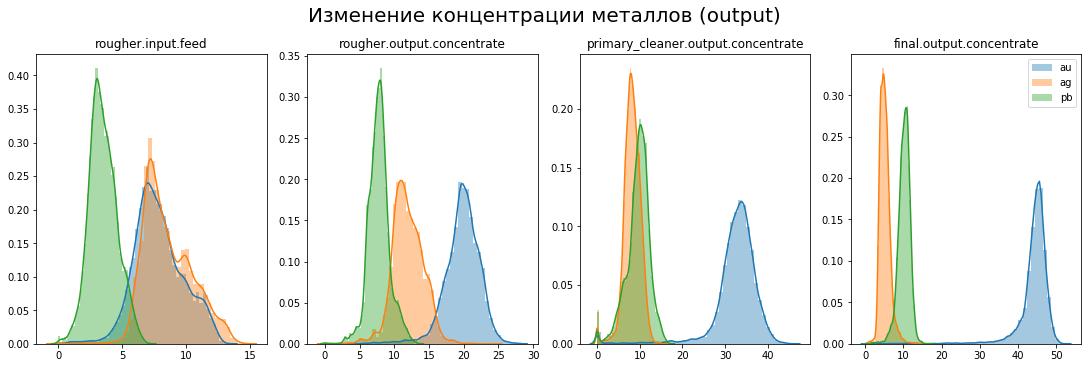

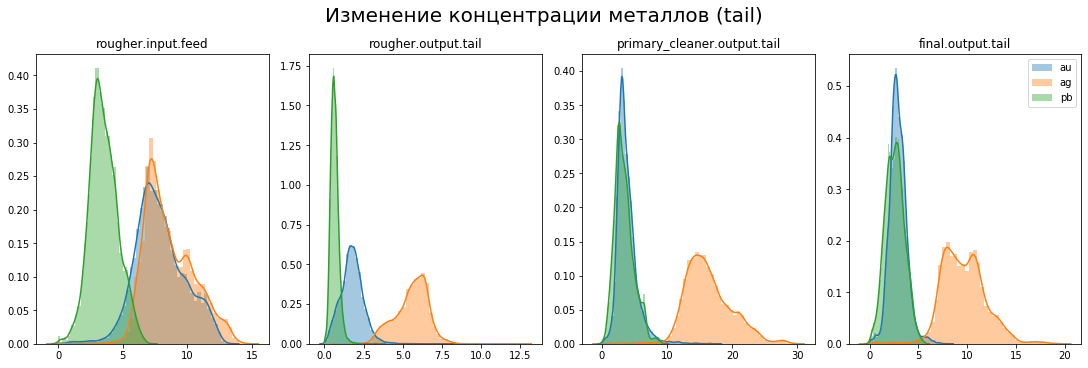

In [27]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

process_tail = ['rougher.input.feed',
                'rougher.output.tail',
                'primary_cleaner.output.tail',
                'final.output.tail']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, len(process), figsize=(15, 5), constrained_layout=True)
fig.suptitle('Изменение концентрации металлов (output)', fontsize=20)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = data_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(data_train.loc[:, cols].dropna(), label=metal, ax=ax)    
plt.legend()

fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
fig.suptitle('Изменение концентрации металлов (tail)', fontsize=20)
for stage, ax in zip(process_tail, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = data_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(data_train.loc[:, cols].dropna(), label=metal, ax=ax)   
plt.legend()

plt.show()

Наблюдается, что в процессе очистки достаточно много нулевых значений, а также, концентрация золота (в большей степени, нежели другие металлы) возрастает. 
Отмечается разная концентрация металлов в хвосте после различных этапов. 

<div class="alert alert-block alert-success">
Графики построены корректно. Да, концентрация золота значительно растет по мере прохождения технологического процесса.
</div>

<div class="alert alert-block alert-info">
Что происходит с другими металлами?
    
Стоило задать один и тот же диапазон изменения осей для всех этапов, чтобы было удобнее сравнивать концентрации металлов между этапами. Еще лучший вариант – изобразить для каждого металла 1 график, а распределения на разных этапах выделить цветами.
</div>

#### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

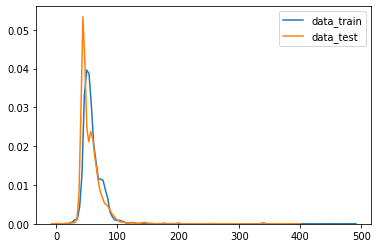

In [28]:
sns.kdeplot(data=data_train['rougher.input.feed_size'].dropna(), label='data_train')
sns.kdeplot(data=data_test['rougher.input.feed_size'].dropna(), label='data_test')

Размеры гранул сырья на обучающей и тестовой выборках похожи. 

<div class="alert alert-block alert-success">
Верно, визуально значительных отличий нет.
</div>

#### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [29]:
datas = (data_train, data_test)

for data in datas:
    
    data.loc[:, 'Суммарная концентрация всех вещевств на стадиях'] = data.loc[:, ['rougher.input.feed_au',
                                'rougher.input.feed_ag',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_sol']].sum(axis=1)

    data.loc[:, 'Суммарная концентрация всех вещевств на стадиях.rougher'] = data.loc[:, ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']].sum(axis=1)

    
    data.loc[:, 'Суммарная концентрация всех вещевств на стадиях.final'] = data.loc[:, ['final.output.concentrate_au',
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


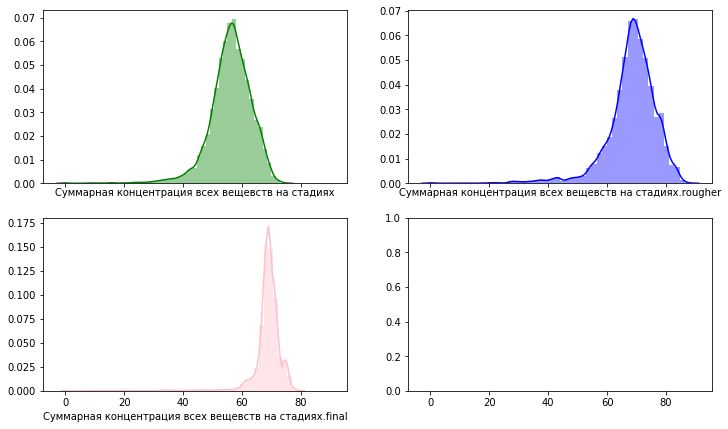

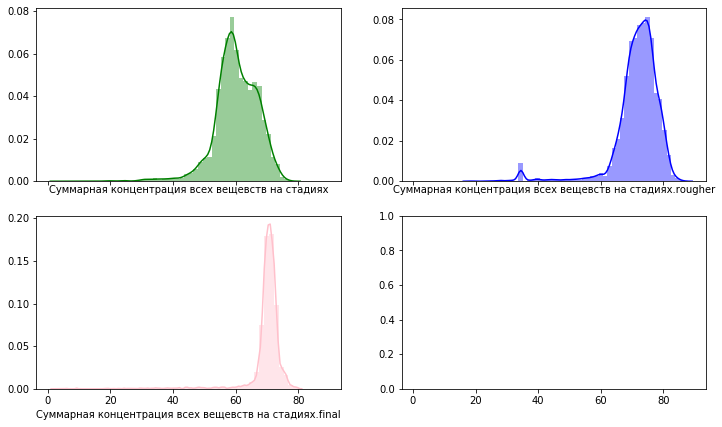

In [30]:
for data in datas:
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях'], color="green", ax=axes[0, 0])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.rougher'], color="blue", ax=axes[0, 1])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.final'], color="pink", ax=axes[1, 0]);

In [31]:
data_train = data_train[(data_train['Суммарная концентрация всех вещевств на стадиях'] > 10) &
 (data_train['Суммарная концентрация всех вещевств на стадиях.rougher'] > 20) &
 (data_train['Суммарная концентрация всех вещевств на стадиях.final'] > 10)]

data_test = data_test[(data_test['Суммарная концентрация всех вещевств на стадиях'] > 10) &
 (data_test['Суммарная концентрация всех вещевств на стадиях.rougher'] > 20) &
 (data_test['Суммарная концентрация всех вещевств на стадиях.final'] > 10)]

In [32]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

for data in (data_train, data_test):
    print(f'duplications for {namestr(data, globals())[0]}: ', data.duplicated().sum())

duplications for data_train:  0
duplications for data_test:  0


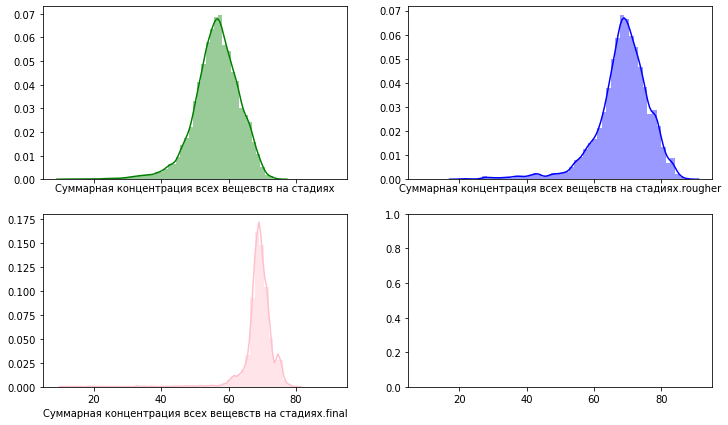

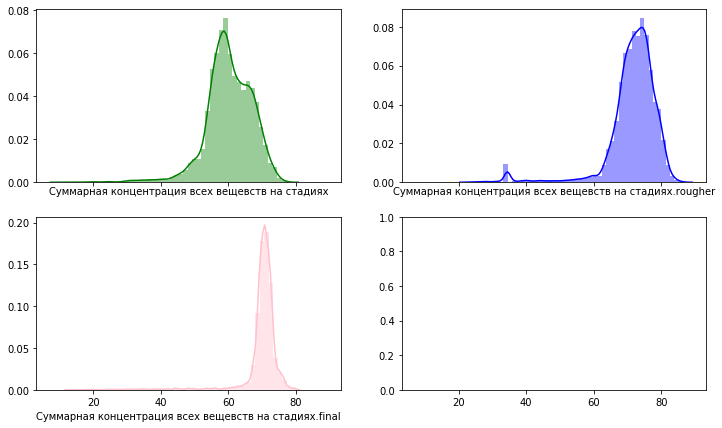

In [33]:
for data in (data_train, data_test):
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях'], color="green", ax=axes[0, 0])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.rougher'], color="blue", ax=axes[0, 1])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.final'], color="pink", ax=axes[1, 0]);

<div class="alert alert-block alert-success">
Графики отличные.
</div>

<div class="alert alert-block alert-danger">

~~Добавь концентрацию вещества sol к концентрациям остальных веществ.~~
    
~~Какие выводы? Видны ли аномальные значения на графиках? Их следует удалить. После удаления аномалий построй аналогичные графики, чтобы убедиться, что все стало в порядке. 
Замечу, что удаление аномалий нужно провести на той выборке, которая будет использоваться в п.3.~~
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий v2:</b>    
    
~~**Околонулевые** значения концентраций, скорее всего, связаны со сбоями измерительного оборудования, их следует удалить.~~
</div>

- готово

<div class="alert alert-block alert-success">
<b>Комментарий v3:</b>    
Прекрасно, все в порядке!
</div>

### Вывод:

- В процессе очистки концентрация золота возрастает

- У рассмотрненных металлов отмечается разная концентрация на разных этапах

- Размеры гранул сырья на обучающей и тестовой выборках похожи

- Суммарная концентрация всех веществ на стадиях уменьшается, но ближе к финальной стадии возрастает

# 3. Модель

#### Напишем функцию для вычисления итоговой sMAPE

In [34]:
def smape(y, y_pred, **kwargs):
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

def end_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

<div class="alert alert-block alert-success">
Функция корректная. Здорово, что обратила внимание на обнуление знаменателя. Как обрабатывать такие значения, следовало бы уточнить у заказчика.
    
Правильно, sMAPE чем меньше, тем лучше, поэтому greater_is_better=False.
</div>

#### Обучим разные модели и оцените их качество кросс-валидацией.

In [35]:
data_train.drop('Суммарная концентрация всех вещевств на стадиях', axis=1, inplace=True)
data_train.drop('Суммарная концентрация всех вещевств на стадиях.rougher', axis=1, inplace=True)
data_train.drop('Суммарная концентрация всех вещевств на стадиях.final', axis=1, inplace=True)
data_test.drop('Суммарная концентрация всех вещевств на стадиях', axis=1, inplace=True)
data_test.drop('Суммарная концентрация всех вещевств на стадиях.rougher', axis=1, inplace=True)
data_test.drop('Суммарная концентрация всех вещевств на стадиях.final', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
data_cols_for_drop = ['final.output.concentrate_ag',
                        'final.output.concentrate_au',
                        'final.output.concentrate_pb',
                        'final.output.concentrate_sol',
                        'final.output.tail_ag',
                        'final.output.tail_au',
                        'final.output.tail_pb',
                        'final.output.tail_sol',
                        'primary_cleaner.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_au',
                        'primary_cleaner.output.concentrate_pb',
                        'primary_cleaner.output.concentrate_sol',
                        'primary_cleaner.output.tail_ag',
                        'primary_cleaner.output.tail_au',
                        'primary_cleaner.output.tail_pb',
                        'primary_cleaner.output.tail_sol',
                        'rougher.calculation.au_pb_ratio',
                        'rougher.calculation.floatbank10_sulfate_to_au_feed',
                        'rougher.calculation.floatbank11_sulfate_to_au_feed',
                        'rougher.calculation.sulfate_to_au_concentrate',
                        'rougher.output.concentrate_ag',
                        'rougher.output.concentrate_au',
                        'rougher.output.concentrate_pb',
                        'rougher.output.concentrate_sol',
                        'rougher.output.tail_ag',
                        'rougher.output.tail_au',
                        'rougher.output.tail_pb',
                        'rougher.output.tail_sol',
                        'secondary_cleaner.output.tail_ag',
                        'secondary_cleaner.output.tail_au',
                        'secondary_cleaner.output.tail_pb',
                        'secondary_cleaner.output.tail_sol']

<div class="alert alert-block alert-danger">
<b>Комментарий v3:</b>    

~~Столбцы с суммарной концентрацией, созданные в предыдущем пункте, тоже следует удалить.~~
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий v4:</b>    

~~Замечание остается.~~
</div>

- готово

<div class="alert alert-block alert-info">
<b>Комментарий v2:</b>    
Столбцы не стоит перечислять вручную, можно было оставить в выборках столбцы data_test_cols (+ целевые столбцы).
</div>

In [37]:
data_test = data_test.drop(columns=data_cols_for_drop)
data_train = data_train.drop(columns=data_cols_for_drop)

<div class="alert alert-block alert-danger">

~~Пропуски в целевых признаках, вообще говоря, заполнять некорректно, их следует удалить. Остальные пропуски, действительно, можно заполнить.~~
</div>

- заполнили и обработали пропуски также в первом пункте. 

In [38]:
def feature_target_rougher(data):
    data_cols = pd.Series(data.columns)
    features_1_col = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1 = data[features_1_col]
    
    scaler_1 = StandardScaler()
    features_1 = scaler_1.fit_transform(features_1)
    target_1 = data['rougher.output.recovery']
    
    return features_1, target_1, scaler_1

In [39]:
def feature_target_final(data):
    features_2 = data.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
    
    scaler_2 = StandardScaler()
    features_2 = scaler_2.fit_transform(features_2)
    target_2 = data['final.output.recovery']
    
    return features_2, target_2, scaler_2

In [40]:
features_1, target_1, scaler_1 = feature_target_rougher(data_train)
features_2, target_2, scaler_2 = feature_target_final(data_train)

<div class="alert alert-block alert-danger">
<b>Комментарий v2:</b>    
    
~~Для преобразования (transform) признаков тестовой выборки нужно использовать scaler, настроенный (fit) на **обучающей** выборке. Поэтому функции feature_target_rougher и feature_target_final должны также возвращать scaler.~~
</div>

- ~~готово~~

<div class="alert alert-block alert-danger">
<b>Комментарий v3:</b>  
    
~~Возвращаемые scaler-ы разные (так как применяются к разным матрицам признаков), поэтому и назвать их надо по-разному:
scaler_1 и scaler_2, например.~~
</div>

- готово

In [41]:
def get_cv_scores(model, target, features):
    my_scorer = make_scorer(smape)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

<div class="alert alert-block alert-success">
Молодец, что настраиваешь гиперпараметры.
</div>

<div class="alert alert-block alert-danger">

~~Для чего нужно настраивать strategy для SimpleImputer, если с пропусками ты предварительно разбираешься ниже? Это только увеличивает время проведения кросс-валидации в 3 раза.~~
</div>

- убрала эту настройку

#### Дерево решений

In [42]:
from collections import defaultdict
d = defaultdict(list)

for depth in range(2, 14):
    
    model_1 = DecisionTreeRegressor(max_depth=depth, random_state=rnd_state)
    model_2 = DecisionTreeRegressor(max_depth=depth, random_state=rnd_state)


    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    d['rougher_smape'].append(rougher_smape)
    d['final_smape'].append(final_smape)
    d['end_smape'].append(end_smape(rougher_smape, final_smape))
    d['depth'].append(depth)

pd.DataFrame(d).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,depth
1,7.005508,9.434345,8.827136,3
0,7.329421,9.421917,8.898793,2
2,7.193961,9.906548,9.228401,4
3,7.598000,10.225721,9.568791,5
4,7.572036,10.825601,10.012210,6
5,8.007125,11.310459,10.484625,7
6,8.144712,11.900197,10.961326,8
7,8.311244,12.398963,11.377033,9
8,8.115013,13.373310,12.058736,10
9,8.251832,14.645021,13.046724,11


Из данной модели наиболее лучший sMAPE при следующих параметрах: max_depth=3, end_smape=8.827136, final_smape = 9.434345, rougher_smape=7.005508	

<div class="alert alert-block alert-success">
<b>Комментарий v2:</b>    
Здорово, что сохраняешь результаты в таблицу, все наглядно. Кросс-валидация и подбор параметров проводятся корректно, молодец!
</div>

#### Случайный лес

In [43]:
from collections import defaultdict
random_forest = defaultdict(list)
for estim in range(1, 20):
    
    model_1 = RandomForestRegressor(max_depth=3, n_estimators=estim, random_state=rnd_state)
    model_2 = RandomForestRegressor(max_depth=3, n_estimators=estim, random_state=rnd_state)
    
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    
    random_forest['rougher_smape'].append(rougher_smape)
    random_forest['final_smape'].append(final_smape)
    random_forest['end_smape'].append(end_smape(rougher_smape, final_smape))
    random_forest['estim'].append(estim)

pd.DataFrame(random_forest).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,estim
17,6.904216,9.175041,8.607335,18
18,6.898156,9.181195,8.610435,19
16,6.931736,9.198982,8.632170,17
15,6.931410,9.220390,8.648145,16
13,6.951596,9.215406,8.649453,14
14,6.938245,9.231585,8.658250,15
12,6.983014,9.217848,8.659139,13
10,7.031280,9.232783,8.682407,11
11,6.996338,9.245670,8.683337,12
8,7.102147,9.256327,8.717782,9


Из данной модели наиболее лучший sMAPE при следующих параметрах: estim=18, end_smape=8.607335, final_smape = 9.175041, rougher_smape=6.904216		

#### Линейная регрессия

In [44]:
model_1 = LinearRegression()
model_2 = LinearRegression()

rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
end_smape_ = end_smape(rougher_smape, final_smape)

data_lr_temp = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
data_lr_temp

rougher_smape     6.649454
final_smape      10.956067
end_smape         9.879414
dtype: float64

<div class="alert alert-block alert-success">
Хорошо, параметры моделей настроили.
</div>

#### Проверка лучшей модели на тестовой выборке

Из результатов выше, наиболее лучшая модель: RandomForestRegressor(max_depth=3, n_estimators=18, random_state=12345)

<div class="alert alert-block alert-danger">
<b>Комментарий v2:</b>    

~~Для тестовой выборки нужно применить метод transform (а не fit_transform) scaler-а, настроенного на соответствующей обучающей выборке.~~
</div>

- ~~готово~~

<div class="alert alert-block alert-danger">
<b>Комментарий v3:</b>    
    
~~Изменений не вижу: все равно в функциях feature_target_rougher/final вызывается метод **fit**_transform,а не transform для тестовой выборки. Как вариант, можно написать аналогичные функции, только передавать в них настроенный scaler:
    def feature_target_rougher_test(data, scaler):
        ...
        ... = scaler.transform(...)
        ...
        return features, target~~
</div>


- готово

In [45]:
def feature_target_rougher_test(data, scaler_1):
    data_cols = pd.Series(data_test.columns)
    features_1_col_test = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1_test = data[features_1_col_test]
    
    #scaler_1 = StandardScaler() ### не нужно
    #scaler_1 = scaler_1_test.fit(features_1_test) ### не нужно
    features_1_test = scaler_1.transform(features_1_test) ### должен быть scaler_1
    target_1_test = data['rougher.output.recovery']
    
    return features_1_test, target_1_test, scaler_1

In [46]:
def feature_target_final_test(data, scaler_2):
    features_2_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
    
    #scaler_2 = StandardScaler() ### не нужно
    #scaler_2= scaler_1_test.fit(features_2_test) ### не нужно
    features_2_test = scaler_2.transform(features_2_test) ### scaler_2
    target_2_test = data_test['final.output.recovery']
    
    return features_2_test, target_2_test, scaler_2

<div class="alert alert-block alert-danger">
<b>Комментарий v4:</b>  
    
~~При обработке тестовой выборки нужно использовать **scaler_1, scaler_2**, настроенные на обучающей выборке, а не создавать новые scaler_1_test, scaler_2_test (см. мои комментарии в коде выше).~~
</div>

- готово

In [47]:
features_1_test, target_1_test, scaler_1 = feature_target_rougher_test(data_test, scaler_1)
features_2_test, target_2_test, scaler_2 = feature_target_final_test(data_test, scaler_2)

In [48]:
from collections import defaultdict
test_dict = defaultdict(list)

model_1 = RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state)
model_2 =  RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state)

model_1.fit(features_1, target_1)
model_2.fit(features_2, target_2)

train_predictions_1 = model_1.predict(features_1_test)
train_predictions_2 = model_2.predict(features_2_test)

 
test_dict['rougher_smape'].append(smape(target_1_test, train_predictions_1))
test_dict['final_smape'].append(smape(target_2_test, train_predictions_2))
test_dict['end_smape'].append(end_smape(smape(target_1_test, train_predictions_1), smape(target_2_test, train_predictions_2)))

pd.DataFrame(test_dict)

,rougher_smape,final_smape,end_smape
0,5.104553,7.993765,7.271462


<div class="alert alert-block alert-danger">
    
~~Если лучшей моделью оказался RandomForestRegressor и хочется увеличить число n_estimators до 100, то нужно сначала провести кросс-валидацию с новым n_estimators и убедиться, что качество на кросс-валидации от этого не упадет. Либо сразу задать n_estimators=100 в pipe.
Заполнять пропуски в признаке rougher.output.recovery некорректно (как и в final.output.recovery), их следует удалить (так как это целевые признаки).~~
</div>

<div class="alert alert-block alert-info">
    
~~Вынеси обработку пропусков тестовой выборки в отдельный пункт.~~
</div>

- переделала

#### Вывод: 

- наилучшая модель: RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state)

- После проверки, итоговая sMAPE равна 7.271462, этот результат лучше, чем на обучающей выборке, что говорит о том, что модель выбрана правильно. 

<div class="alert alert-block alert-success">
<b>Комментарий v2:</b>    
Качество на тестовой выборке могло оказаться и больше качества на кросс-валидации, это ничему не противоречит :) Главное, чтобы они не сильно отличались.
</div>

<div class="alert alert-block alert-success">
Отлично, итоговое sMAPE на тестовой выборке получено.
</div>

<div class="alert alert-block alert-danger">

~~Добавь проверку итоговой модели на адекватность: сравни ее качество с качеством константной модели, предсказывающей среднее/медианное значение для всех объектов тестовой выборки. Обращаю внимание, что среднее/медианное значение должно вычисляться по обучающей выборке. Можно использовать DummyRegressor.~~

</div>

- готово

### Проверка модели на адекватность

Проверим модель на адекватность с помощью DummyRegressor.

In [49]:
features_1, target_1, scaler_1 = feature_target_rougher(data_train)
features_2, target_2, scaler_2 = feature_target_final(data_train)

model_1 = DummyRegressor(strategy="mean")
model_2 = DummyRegressor(strategy="mean")

rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
end_smape_ = end_smape(rougher_smape, final_smape)

drm = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
drm

rougher_smape     7.771774
final_smape      10.539761
end_smape         9.847764
dtype: float64

<div class="alert alert-block alert-success">
<b>Комментарий v2:</b>   
    
Хорошо, все верно.    
    
Альтернативный вариант – не проводить кросс-валидацию, а настроить константную модель на обучающей выборке и оценить ее качество на тестовой. Полученное значение сравнить с sMAPE лучшей модели на тестовой выборке.
</div>

#### Вывод: 
Модель, которую мы выбрали наилучшей - RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state), действительно оказалась рабочей, так как качество sMAPE у нее лучше, чем у DummyRegressor.

<div class="alert alert-block alert-warning">
<b>Итоговый комментарий:</b> 

~~Спасибо, ты провела большое и сложное исследование, осталось его немного доработать. Основные замечания касаются п.3.~~
    
~~Спасибо за доработки! Остались мелкие замечания в пунктах 1.4, 2, 3.~~
    
~~Мария, спасибо, еще немного: одно замечание в п. 1.4 и три замечания в п. 3.~~
    
~~Мария, еще немного :)~~
    
Ура, победа!

</div>

- готово

#### Третий шаг в первом варианте. 

def recovery(C, F, T):
    
    numerator = (C*(F-T))
    denominator =(F*(C-T))
    
    rec = numerator / denominator * 100
    
    #Подстрахуемся и заполним значения, чтобы не были очень маленькими и очень большими
    rec[rec<0] = np.nan
    rec[rec>100] = np.nan
    return rec
    
t,f,c = data_train['rougher.output.tail_au'], data_train['rougher.input.feed_au'], data_train['rougher.output.concentrate_au']
rec = recovery(c, f, t)
right_recovery_sum = np.isclose(data_train['rougher.output.recovery'], rec).sum()
right_recovery_sum, data_train.shape[0]-right_recovery_sum

rec.describe()

mean_absolute_error(train['rougher.output.recovery'].interpolate(method='time'),
                    rec.interpolate(method='time'))

rec.isna().sum()


def sMAPE(y_true, y_pred, multioutput='uniform_average'):
    
    numerator = np.abs(y_true-y_pred)
    denominator =(np.abs(y_true)+np.abs(y_pred))/2
    
    output_errors = np.divide(numerator, denominator)
    
    nonzero_denominator = denominator != 0   
    output_errors[~nonzero_denominator] = 0
    
    output_scores = np.average(output_errors, axis=0)
    
    if multioutput == 'raw_values':
        return output_scores
    elif multioutput == 'uniform_average':
        pass
    return np.average(output_scores)


neg_smape = make_scorer(sMAPE, greater_is_better=False)

X_train = data_train[data_test.columns]

rougher_cols = X_train.columns.str.contains('rougher')
X_train_rougher = X_train.loc[:, rougher_cols]
X_test_rougher = data_test.loc[:, rougher_cols]
y_train_rougher = data_train[['rougher.output.tail_au', 'rougher.output.concentrate_au']]

final_cols = X_train.columns.str.contains('cleaner')
X_train_cleaner = X_train.loc[:, final_cols]
X_test_cleaner = data_test.loc[:, final_cols]
y_train_cleaner = data_train[['final.output.tail_au', 'final.output.concentrate_au']]

Подготовим пайплайн, где заполним пропуски, подготовим скалер для регрессии и обучим разные модели.
pipe = Pipeline([
    ('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=rnd_state))
])

params = [
    {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [RandomForestRegressor(n_estimators=10, random_state=rnd_state)],
        'model__max_features': np.linspace(0.1, 1, 10)
    }, {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [LinearRegression()]
    }, {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [Ridge(random_state=rnd_state)],
        'model__alpha': np.logspace(-3, 1, 10)
    }, {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [Lasso(random_state=rnd_state)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
]

Пропуски:
data_train[['rougher.output.tail_au', 'rougher.output.concentrate_au', 'rougher.output.recovery']].isnull().sum()
data_train['rougher.output.tail_au'].dropna(inplace=True)
data_train['rougher.output.concentrate_au'].dropna(inplace=True)
data_train['rougher.output.recovery'].dropna(inplace=True)
data_full['rougher.output.tail_au'].dropna(inplace=True)
data_full['rougher.output.concentrate_au'].dropna(inplace=True)
print(data_train['rougher.output.tail_au'].isnull().sum())
print(data_train['rougher.output.concentrate_au'].isnull().sum())
print(data_train['rougher.output.recovery'].isnull().sum())
print(data_full['rougher.output.tail_au'].isnull().sum())
print(data_full['rougher.output.concentrate_au'].isnull().sum())

data_train['final.output.tail_au'].dropna(inplace=True)
data_train['final.output.concentrate_au'].dropna(inplace=True)
data_full['final.output.tail_au'].dropna(inplace=True)
data_full['final.output.concentrate_au'].dropna(inplace=True)
print(data_train['final.output.tail_au'].isnull().sum())
print(data_train['final.output.concentrate_au'].isnull().sum())
print(data_full['final.output.tail_au'].isnull().sum())
print(data_full['final.output.concentrate_au'].isnull().sum())

def fill_target_nan(y):
    y = y.interpolate(method='time')
    return y

y_train_rougher = fill_target_nan(y_train_rougher)
y_train_cleaner = fill_target_nan(y_train_cleaner)  

def drop_target_zeros(X, y):
    y = y[(y != 0).all(1)]  
    X = X.loc[y.index, :]
    return X, y

X_train_rougher, y_train_rougher = drop_target_zeros(X_train_rougher, y_train_rougher)
X_train_cleaner, y_train_cleaner = drop_target_zeros(X_train_cleaner, y_train_cleaner) 

Проверим размеры после интерполяции и удаления нулей:
print(X_train_rougher.shape, y_train_rougher.shape,
      X_train_cleaner.shape, y_train_cleaner.shape)
Размер стал меньше, операция прошла успешно =)      
     
print(data_test['rougher.input.feed_au'].isnull().sum())
print(data_test.isnull().sum())

Обработка, заполнение пропусков: 

Проверим размеры после интерполяции и удаления нулей: 

Размер стал меньше, операция прошла успешно =) 

Начнем обучение на разных меоделях и оценим их качество кросс-валидизацией. 

cv = TimeSeriesSplit(n_splits=3)

grid_rougher = GridSearchCV(pipe, param_grid=params, cv=cv, scoring=neg_smape, n_jobs=-1)

%%time
grid_rougher.fit(X_train_rougher, y_train_rougher)

grid_rougher.best_params_, grid_rougher.best_score_

grid_cleaner = GridSearchCV(pipe, param_grid=params, cv=cv, scoring=neg_smape, n_jobs=-1)

%%time
grid_cleaner.fit(X_train_cleaner, y_train_cleaner)

grid_cleaner.best_params_, grid_cleaner.best_score_

input_au = data_test['rougher.input.feed_au']

pipe_rougher = grid_rougher.best_estimator_

if type(pipe_rougher.steps[2][1]) is type(RandomForestRegressor()):    
    pipe_rougher.steps[2][1].n_estimators = 100 #с увеличением числа деревьев качество должно улучшаться
    
pipe_rougher.fit(X_train_rougher, y_train_rougher)

y_pred_rougher_tail, y_pred_rougher_conc = pipe_rougher.predict(X_test_rougher).T
rougher_recovery = recovery(y_pred_rougher_conc, input_au, y_pred_rougher_tail)

smape_rougher = sMAPE(data_full.loc[X_test_rougher.index, 'rougher.output.recovery'].interpolate(method='time'),
                      rougher_recovery.interpolate(method='time'))
smape_rougher

pipe_cleaner = grid_cleaner.best_estimator_

if type(pipe_cleaner.steps[2][1]) is type(RandomForestRegressor()):    
    pipe_cleaner.steps[2][1].n_estimators = 100 #с увеличением числа деревьев качество должно улучшаться
    
pipe_cleaner.fit(X_train_cleaner, y_train_cleaner)

y_pred_cleaner_tail, y_pred_cleaner_conc = pipe_cleaner.predict(X_test_cleaner).T
cleaner_recovery = recovery(y_pred_cleaner_conc, input_au, y_pred_cleaner_tail)

smape_cleaner = sMAPE(data_full.loc[X_test_rougher.index, 'final.output.recovery'].fillna(0),
                      cleaner_recovery.fillna(0))
smape_cleaner

<div class="alert alert-block alert-danger">
Замечания те же, что и выше.
</div>

final_smape = 0.25*smape_rougher + 0.75*smape_cleaner
final_smape

### Вывод: 

- наиболее лучшая модель - RandomForestRegressor(n_estimators = 100) / с увеличением числа деревьев качество должно улучшаться

- итоговая sMAPE равна 0.1267547682897006 

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке